# Сингулярное разложение.
(большая часть материалов взята из курса \"Численные Методы\", магистерской программы ФПМИ \"Научное Программное Обеспечение\". Автор  Константин Тихонов.")

Полезные ссылки 

https://www.youtube.com/watch?v=bJcc7A3TtYM  

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues  

In [57]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.size": 14,
    "font.serif": ["Palatino"],
})

## Ранг матрицы.

Ранг = размерности пространства строк = размерности пространства столбцов.
- Мы еще не обсуждали, как вычислить ранг матрицы
- Один (наиболее надежный, но несколько затратный) способ вычисления ранга матрицы состоит в выполнении ее SVD-декомпозиции.
- Прежде чем мы перейдем к этому, давайте поиграем с функцией matrix_rank из numpy.

In [58]:
# A random matrix has full rank
import numpy as np
import numpy.linalg as la
n = 100
A = np.random.normal(size=(n,n))
la.matrix_rank(A)

100

Давайте создадим матрицу ранга 1. 

In [59]:
u = np.random.normal(size=(n, 1))
A = u @ u.T
la.matrix_rank(A)

1

$A_{ij} = u_j u_j$

In [60]:
# Consider a small perturbation of A
delta_A = 1e-12*np.random.normal(size=(n,n))
Ap = A + delta_A

In [61]:
# upper left corner of A
A[:2,:2]

array([[ 0.75101565, -0.86051342],
       [-0.86051342,  0.98597593]])

In [62]:
# upper left corner of Ap
Ap[:2,:2]

array([[ 0.75101565, -0.86051342],
       [-0.86051342,  0.98597593]])

In [63]:
la.matrix_rank(Ap)

86

Ранг матрицы очень чувствителен к малым возмущениям матрицы.

Размерность пространства, натянутого на набор векторов, может быть плохо определена.

Сегодня мы решим эту проблему, чтобы лучше понять связанные с этим свойства матрицы.

## Что следует из того, что мы знаем, что у матрицы малый ранг?

Рассмотрим сгенерированную $n\times n$ матрицу $A = \bigg[a_1\bigg|a_2\bigg|...\bigg|a_n\bigg]$:
- Она содержит $\mathcal{O}(n^2)$ элементов в таблице $A$
- Она требует $\mathcal{O}(n^2)$ операций для вычисления $u=Av$ при данном v

Рассмотрим матрицу первого ранга $A$
-- Для хранения $A$ требуется $\mathcal{O}(n)$ элементов. Действительно, все столбцы коллинеарны:
требуется $n$ элементов для хранения одного столбца $a_1$ и $n-1$ элементов для хранения коэффициентов пропорциональности $b_i$, таких что $$a_i = b_i a_1$$

В результате матрица сжимается:

$$
A_{ij} = a_i b_j\quad\textrm{or}\quad A=a^T b
$$

- Требуется $\mathcal{O}(n)$ флопов, чтобы вычислить $u=Av$ для заданного $v$. 

## Приближение низкого ранга.

In [64]:
u = np.random.normal(size=(n, 1))
A = u @ u.T
delta_A = 1e-10*np.random.normal(size=(n,n))
Ap = A + delta_A

In [65]:
# according to matrix_rank the rank of Ap is almost as high as it can be
la.matrix_rank(Ap)

100

In [66]:
# what error do we make if we replace Ap by a rank-1 matrix A?
print("absolute error:", np.linalg.norm(A - Ap))
print("relative error:", np.linalg.norm(A - Ap)/np.linalg.norm(A))

absolute error: 9.995052005877655e-09
relative error: 9.814801454746973e-11


Таким образом, матрица A ранга 1 обеспечивает очень хорошее приближение к матрице Ap ранга 100.
Это очень искусственный пример. Наша цель сегодня — понять, как это может работать в общем случае.

## Геометрические соображения

Рассмотрим произвольную матрицу размером m × n A . Он отображает произвольный n-мерный вектор v в m-мерный вектор u : u=Av .
Рассмотрим геометрический смысл этого факта.

## Сингулярное разложение.

Любая матрица A размером m × n может быть записана в виде произведения трех матриц:

А=UΣV∗,

где для K=min(m,n):

U - матрица размера m × K с ортонормированными столбцами,
V - матрица размера n × K с ортонормированными столбцами,
Σ — диагональная матрица с неотрицательными элементами на диагонали. 

Приведенное SVD ( m≥n ):  иногда удобно добавить недостающие столбцы, чтобы обе матрицы ( U и V ) стали унитарными.

Полное SVD.   

Мы можем записать A поэлементно:

$$a_{ij} = \displaystyle{\sum_{\alpha=1}^r} \sigma_\alpha u_{i\alpha} v_{j\alpha}^{*}$$

Обычно диагональные элементы  $\Sigma$ нумеруются в порядке убывания
 $\sigma_1 \geq  \ldots, \geq \sigma_K$.
Если $\text{rank}(A) = r$, то: $\sigma_{r+1} = ... = \sigma_K = 0.$


Столбцы матриц U и V известны как левые и правые сингулярные векторы. Они образуют ортонормированные множества в пространстве образа ($u_i$) и прообраза ($v_i$) матрицы A. Их геометрический смысл:  

$$\text{ker}(A) = \mathrm{span}\{v_{r+1},\dots,v_K\}$$

$$\text{im}(A) = \mathrm{span}\{u_{1},\dots,u_r\}$$

## Теорема Эккарта-Янга.

Наилучшее низкоранговое приближение может быть вычислено с помощью SVD.

Пусть r<rank(A) , B — матрица ранга r (подлежит оптимизации). Тогда

$$ \min_{\text{rank}(B)=r} \|A - B\|_2 = \sigma_{r+1}. $$ 

## Приближение низкого ранга.

Наилучшее приближение ранга-$r$ матрицы $A$ получается, если установить $\sigma_{r+1}= 0, \ldots, \sigma_K = 0$:

$$A_r = U_r \Sigma_r V_r^*.$$

Ошибка

$$ \min_{\text{rank}(B)=r} \Vert A - B \Vert_2 =  \Vert A - A_r \Vert_2 = \sigma_{r+1}$$

Таким образом, чем быстрее затухают сингулярные числа, тем выше точность «сжатия» матрицы в низкоранговую форму.

То же верно и для нормы Фробениуса: 

$$\min_{\text{rank}(B)=r}\Vert A - B \Vert_F =  \Vert A - A_r \Vert_F = \sqrt{\sigma_{r+1}^2 + \dots + \sigma_{K}^2}$$

## Вычисление SVD

Алгоритмы вычисления SVD сложны. Некоторые подходы будут рассмотрены позже.

Мы готовы использовать реализации NumPy и SciPy

Вообще говоря, можно думать о 

(i) точном вычислении полного SVD, 

(ii) точном вычислении «разреженного» SVD, где нам нужны только первые k≪n сингулярных значений и векторов, и 

(iii) рандомизированном SVD (приблизительном вычислении главного подмножества сингулярных значений и векторов)

In [67]:
# Recall: Computing matrix rank
import numpy as np
print('Rank of the matrix:', np.linalg.matrix_rank(A))
print('Rank of the matrix:', np.linalg.matrix_rank(Ap))

Rank of the matrix: 1
Rank of the matrix: 100


In [68]:
A[:2,:2]

array([[ 0.00058005, -0.00788864],
       [-0.00788864,  0.1072855 ]])

In [69]:
Ap[:2,:2]

array([[ 0.00058005, -0.00788864],
       [-0.00788864,  0.1072855 ]])

In [70]:
u, s, vh = np.linalg.svd(A)
up, sp, vhp = np.linalg.svd(Ap)

In [71]:
s[:10]

array([1.01836518e+02, 1.01754832e-14, 1.01754832e-14, 1.01754832e-14,
       1.01754832e-14, 1.01754832e-14, 1.01754832e-14, 1.01754832e-14,
       1.01754832e-14, 1.01754832e-14])

In [72]:
sp[:10]

array([1.01836518e+02, 2.01919856e-09, 1.90865204e-09, 1.83113637e-09,
       1.80693825e-09, 1.72529606e-09, 1.70519910e-09, 1.67394686e-09,
       1.66643414e-09, 1.64243779e-09])

SVD позволяет корректно определить числовой ранг для заданной погрешности ϵ

Сингулярные значения случайной гауссовой матрицы

Text(0.5, 0, 'i ')

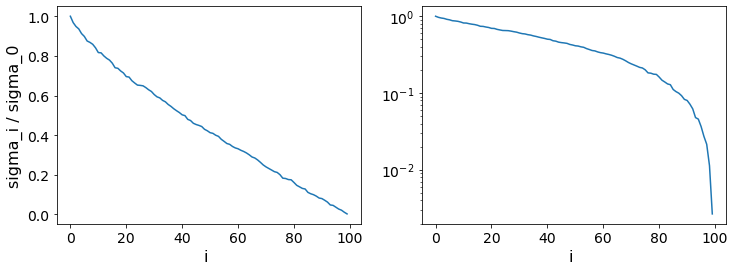

In [73]:
import numpy as np
import matplotlib.pyplot as plt
n = 100
a = np.random.randn(n, n)
s = np.linalg.svd(a, compute_uv=False)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(s/s[0])
ax[1].plot(s/s[0])
ax[1].set_yscale('log')
ax[0].set_ylabel('sigma_i / sigma_0', fontsize=16)
ax[0].set_xlabel('i ', fontsize=16)
ax[1].set_xlabel('i ', fontsize=16)

# Применение сингулярного разложения для сжатия матриц.

Для плотных матриц требуется хранить $N^2$ элементов. Аппроксимация ранга-r может уменьшить это число O($N_r$) . В качестве примера рассмотрим сжатие изображений.

In [9]:
# from scikit_image import data
import scikit_image
# from skickit_image.color import rgb2gray
# from numpy.linalg import svd
# from skimage import img_as_float

ModuleNotFoundError: No module named 'scikit_image'

In [ ]:
cat = rgb2gray(img_as_float(data.chelsea())) 
cat.shape

In [75]:
plt.imshow(cat)

NameError: name 'cat' is not defined

In [76]:
U, s, Vc = svd(cat, full_matrices=False)
def compress_and_show(k):
    os = cat.shape
    cat_compressed = U[:,:k] @ np.diag(s[:k]) @ Vc[:k,:]
    compression_ratio = 100.0* (k*(os[0] + os[1])+k)/(os[0]*os[1])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(cat_compressed)
    plt.axis('off')
    plt.tight_layout()

NameError: name 'svd' is not defined

In [77]:
compress_and_show(200)

NameError: name 'compress_and_show' is not defined

NameError: name 's' is not defined

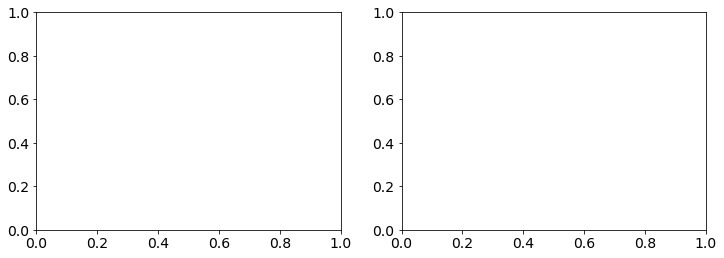

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(s)
ax[1].plot(s)
ax[1].set_yscale('log')

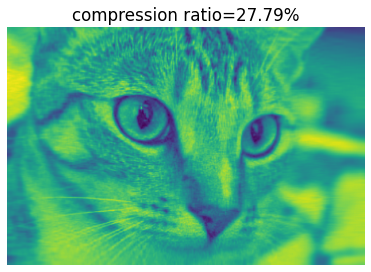

In [34]:
compress_and_show(50)

# Метод главных компонент 

Рассмотрим множество точек. 

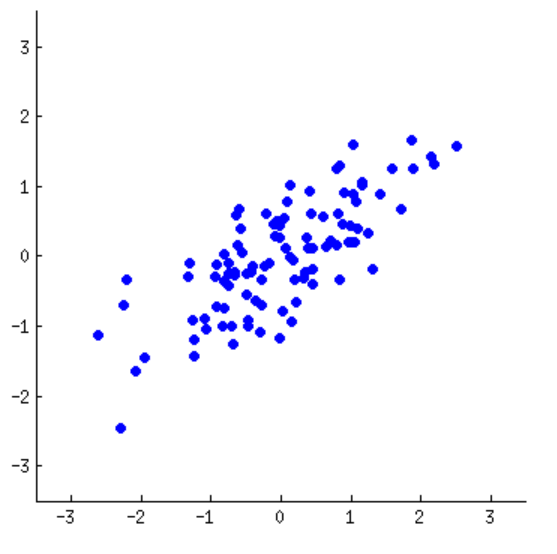 

Два «свойства» каждой точки выборки (x и y на этом графике) коррелируют. Давайте подумаем о каком-то новом «свойстве», заданном линейной комбинацией w1x+w2y. PCA ищет свойства, которые показывают как можно больше различий между точками данных. Точно так же PCA ищет свойства, которые позволяют максимально точно восстановить исходные характеристики.

Рассмотрим проекцию точек данных на определенное (одно) направление. Где следует проектировать, чтобы поддерживать наибольшее разнообразие точек данных? Связанный с этим вопрос: какова наилучшая линейная подгонка?

![](https://i.stack.imgur.com/lNHqt.gif)

Результат будет такой

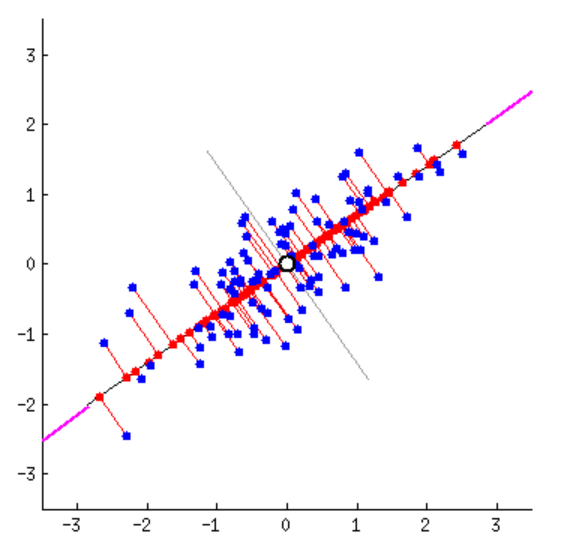

Первый компонент должен быть определен, чтобы максимизировать дисперсию. Проекции точек данных $\mathbf  {a}_{{(i)}}$ на вектор ${\mathbf  {w}}$ задаются как $\mathbf  {a}_{{(i)}}\cdot {\mathbf  {w}}$. Допустим, мы уже стандартизировали данные, тогда нам нужно решить следующую задачу оптимизации:

$$
{\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {a}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}
$$

или, объединяя векторы $\mathbf  {a}_{{(i)}}$ в строки матрицы $\mathbf {A}$, мы можем записать в виде:

$$
{\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Aw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} \right\}
$$



Ключевым элементом тут является матрица $A^T A$, пропорциональная эмпирической ковариационной матрице. Известно, что для положительно полуопределенной матрицы $A^\top A$ решением является собственный вектор матрицы $A^\top A$, соответствующий наибольшему собственному значению. Мы можем повторить эту процедуру и построить другое направление, объясняющее столько же отклонений в ортогональных направлениях. Таким образом, мы можем заключить, что следующая линейная операция ($n$ остается для количества точек наблюдения и $d$ для размерностей векторов наблюдения):

$$
\underset{n \times d}{A} \longrightarrow \underset{n \times k}{A^\prime} = \underset{n \times d}{A} \cdot \underset{d \times k}{W} 
$$

описывает проекцию данных на $k$ главных компонент, где $W$ содержит первые (по размеру собственных значений) $k$ собственных векторов $A^\top A$

Формально мы можем начать с SVD-разложения $A$:

$$A = U \Sigma W^\top$$ 

Затем рассмотрим матрицу $A^\top A$:

$$A^\top A=W \Sigma^2 W^\top$$

Что соответствует собственному разложению матрицы $A^\top A$, где $W$ — матрица собственных векторов матрицы $A^\top A$, а $\Sigma^2$ содержит собственные значения матрицы $A^\top A $. Другими словами, столбцы $W$ являются правыми сингулярными векторами $A$.

Итого, получаем:

$$
A \longrightarrow A \cdot W = U \Sigma W^\top W = U \Sigma
$$


## Пример уменьшения размерности с помощью PCA: набор данных Wine

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [36]:
wine = load_wine()

A = wine['data']
print(wine['data'].shape, "\n")

labels = wine['target']
print(labels)

classes = [0, 1, 2]
colors = ['red', 'green', 'blue']

(178, 13) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [37]:
# data standardization
A_std = StandardScaler().fit_transform(A)

In [38]:
A_std[:10,:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254],
       [ 0.24628963, -0.49941338, -0.82799632],
       [ 0.19687903,  0.02123125,  1.10933436],
       [ 1.69154964, -0.34681064,  0.4879264 ],
       [ 0.29570023,  0.22769377,  1.84040254],
       [ 1.48155459, -0.51736664,  0.30515936],
       [ 1.71625494, -0.4186237 ,  0.30515936],
       [ 1.3086175 , -0.16727801,  0.89001391],
       [ 2.25977152, -0.62508622, -0.7183361 ],
       [ 1.0615645 , -0.88540853, -0.352802  ]])

Как мы можем визуально проверить набор данных? Напомним, что у нас есть 178 точек данных в 13-мерном пространстве. Что, если мы каким-то случайным образом уменьшим размерность? Давайте выберем две случайные функции.

In [39]:
rank = 2
ix = np.random.choice(A.shape[1], 2, replace=False)
print(ix)

[2 3]


In [40]:
def inspect_projections(projections):
    for label, colour in zip(classes, colors):
        plt.scatter(projections[labels == label, 0],
                    projections[labels == label, 1],
                    label = label,
                    c = colour)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

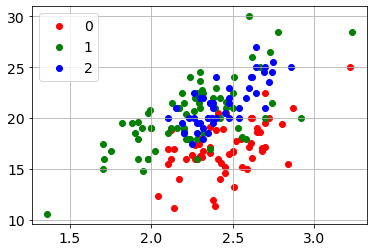

In [42]:
rnd_projections = A[:, ix]
inspect_projections(rnd_projections)

## Давайте используем PCA для  проекции

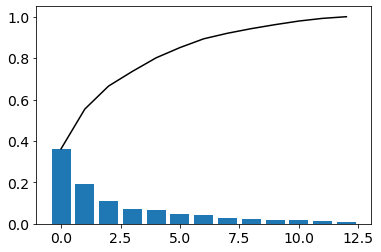

In [43]:
u, s, wh = np.linalg.svd(A_std)
cum_s = np.cumsum(s**2)
plt.plot(cum_s/cum_s[-1], color = 'black')
plt.bar(x=np.arange(len(s)), height=s**2/cum_s[-1]);

Спроецируем на главные компоненты: $A \longrightarrow U \Sigma$

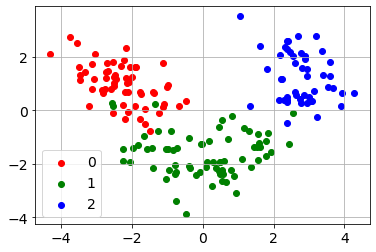

In [44]:
projections = u[:,:rank] @ np.diag(s[:rank])
inspect_projections(projections)

Понятно, что прогнозы, полученные с помощью SVD, гораздо лучше отражают разнообразие данных, чем просто два случайных столбца. Полученные проекции можно передать вашему любимому алгоритму классификации. В этом случае мы свели (самостоятельно) данные в 13-мерном пространстве к данным в 2-мерном пространстве!


# Разбор примеров.

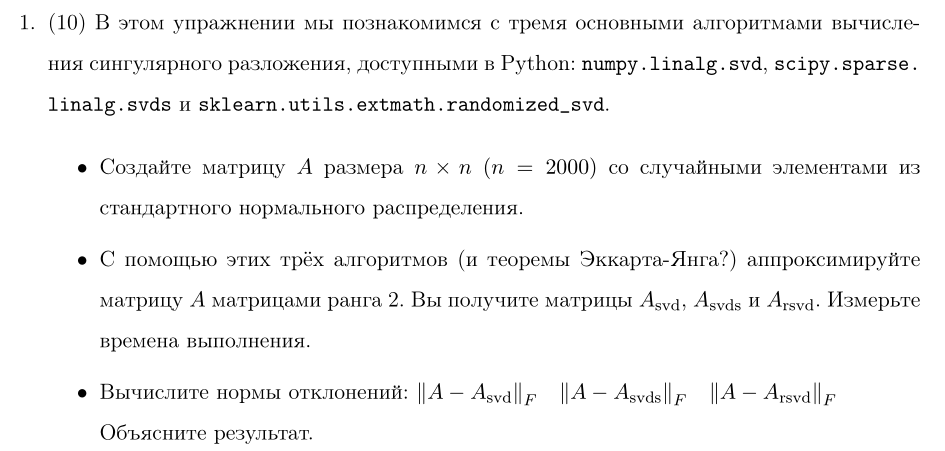

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 2000
A = np.random.random((N, N))


Сгенерируйте случайную симметричную матрицу A размера 3 × 3. Сгенерируйте N элементов из нормального
распределения P ∝ e −xT Ax
(получится матрица объект-признак X размерности N×3). Визуализируйте полученное
облако точек (для построения интерактивных трехмерных графиков можно воспользоваться пакетом ipympl в
системе jupyter). Примените к матрице X метод главных компонент, визуализируйте сингулярные вектора вместе с
облаком точек, а также двумерные проекции элементов выборки на плоскости, задаваемые сингулярными векторами.

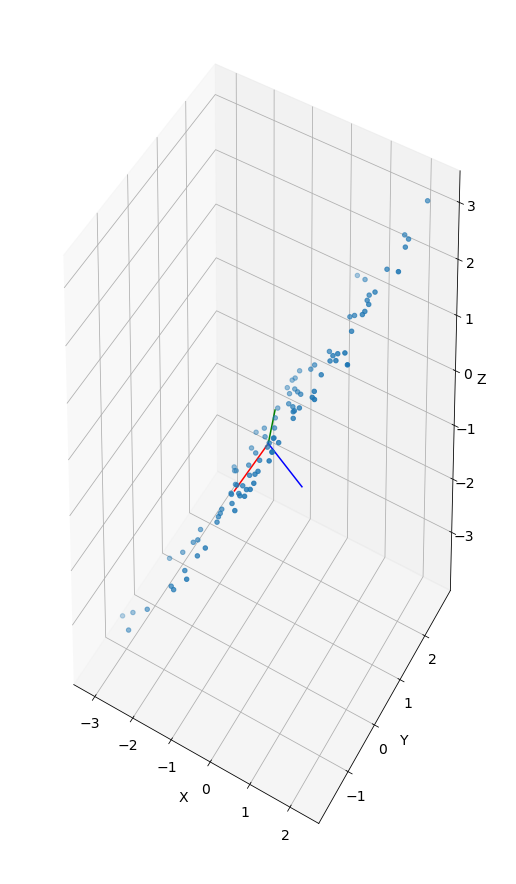

In [45]:
from sklearn.decomposition import PCA 
N = 100
A = np.random.random((3, 3))
A = A @ A.T

X = np.random.multivariate_normal([0,0,0], A, N)
x = X[:, 0]
y = X[:, 1]
z = X[:, 2]
fig = plt.figure(figsize=(9, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, label='parametric curve')

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

clrs = ("r", "g", "b")
for i in range(3):
    x0, y0, z0 = pca.components_[i];
    ax.plot([0, x0], [0, y0], [0, z0], color=clrs[i])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

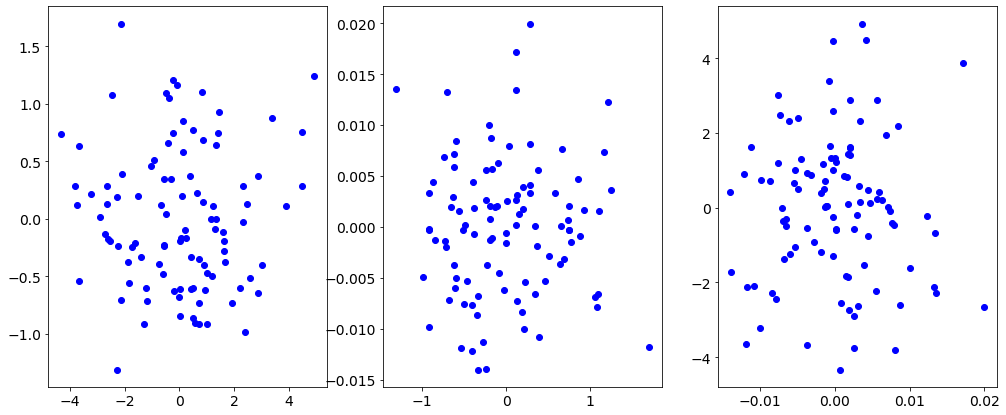

In [46]:
data = pca.transform(X)

fig, axs = plt.subplots(1, 3, figsize=(17, 7))
subscripts = ("X", "Y", "Z")

for i in range(3):
    x = data[:, i]
    y = data[:, (i+1)%3]
    axs[i].scatter(x, y, color="b")

plt.show()